# Assessment Review

In [3]:
# Import libraries - will need pandas, matplotlib, seaborn, and scipy's stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

C:\Users\shawj\.conda\envs\learn-env\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Import the data - it's saved as 'auto-mpg.csv'
df = pd.read_csv("auto-mpg.csv")

In [5]:
# Check the head of our data
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
# Check the info on our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [7]:
# Describe our data
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
# Drop the 'car name' and 'model year' columns, for simplicity
df.drop(columns=["car name", "model year"], inplace=True)

## Hypothesis Testing

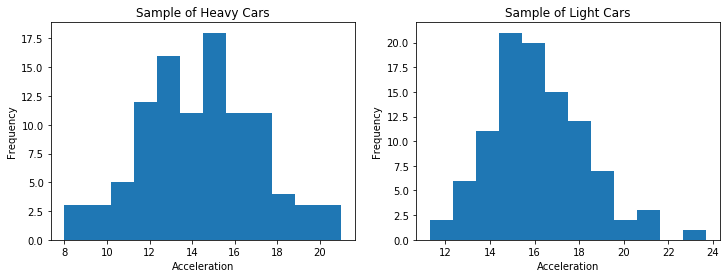

In [9]:
# Run this cell without changes to set up for the next set of questions

# Grabbing the median car weight
weight_median = df['weight'].median()

# Separating based on light cars and heavy cars
heavy_cars = df.loc[df['weight'] > weight_median].sample(n=100, random_state=42)
light_cars = df.loc[df['weight'] <= weight_median].sample(n=100, random_state=42)

# Plotting histograms for acceleration for both light and heavy cars
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Heavy Cars')
ax1.set_xlabel('Acceleration')
ax1.set_ylabel('Frequency')
ax1.hist(heavy_cars['acceleration'], bins=12)

ax2.set_title('Sample of Light Cars')
ax2.set_xlabel('Acceleration')
ax2.set_ylabel('Frequency')
ax2.hist(light_cars['acceleration'], bins=12)
plt.show()

### Question 1

Car manufacturers want to know if light cars accelerate faster than heavy cars.

Set up the null and alternative hypotheses for this test:

Null Hypothesis: there is no statistically significant difference in the mean acceleration between the heavy and light cars.
Alternative Hypothesis: Lighter cars accelerate more quickly than heavy cars.

### Question 2

Now test it! Use alpha = 0.05 and assume the samples have equal variance


In [ ]:
stats.ttest_ind

In [23]:
import numpy as np
stats.ttest_ind(heavy_cars.acceleration,np.array(light_cars.acceleration)).pvalue < .05

#Reject H0

True

### Question 3

Make a decision.  Can you reject the null hypothesis?

## Ordinary Least Squares Regression Practice

Car manufacturers have asked us to predict how many miles per gallon a car can run based on the other variables we have in the data we're given. Sounds like a regression problem! But first let's further explore the data.

### Question 4

 Make a pairplot using seaborn to examine the relationships between variables
 Note - do this on the whole dataframe, not just independent variables

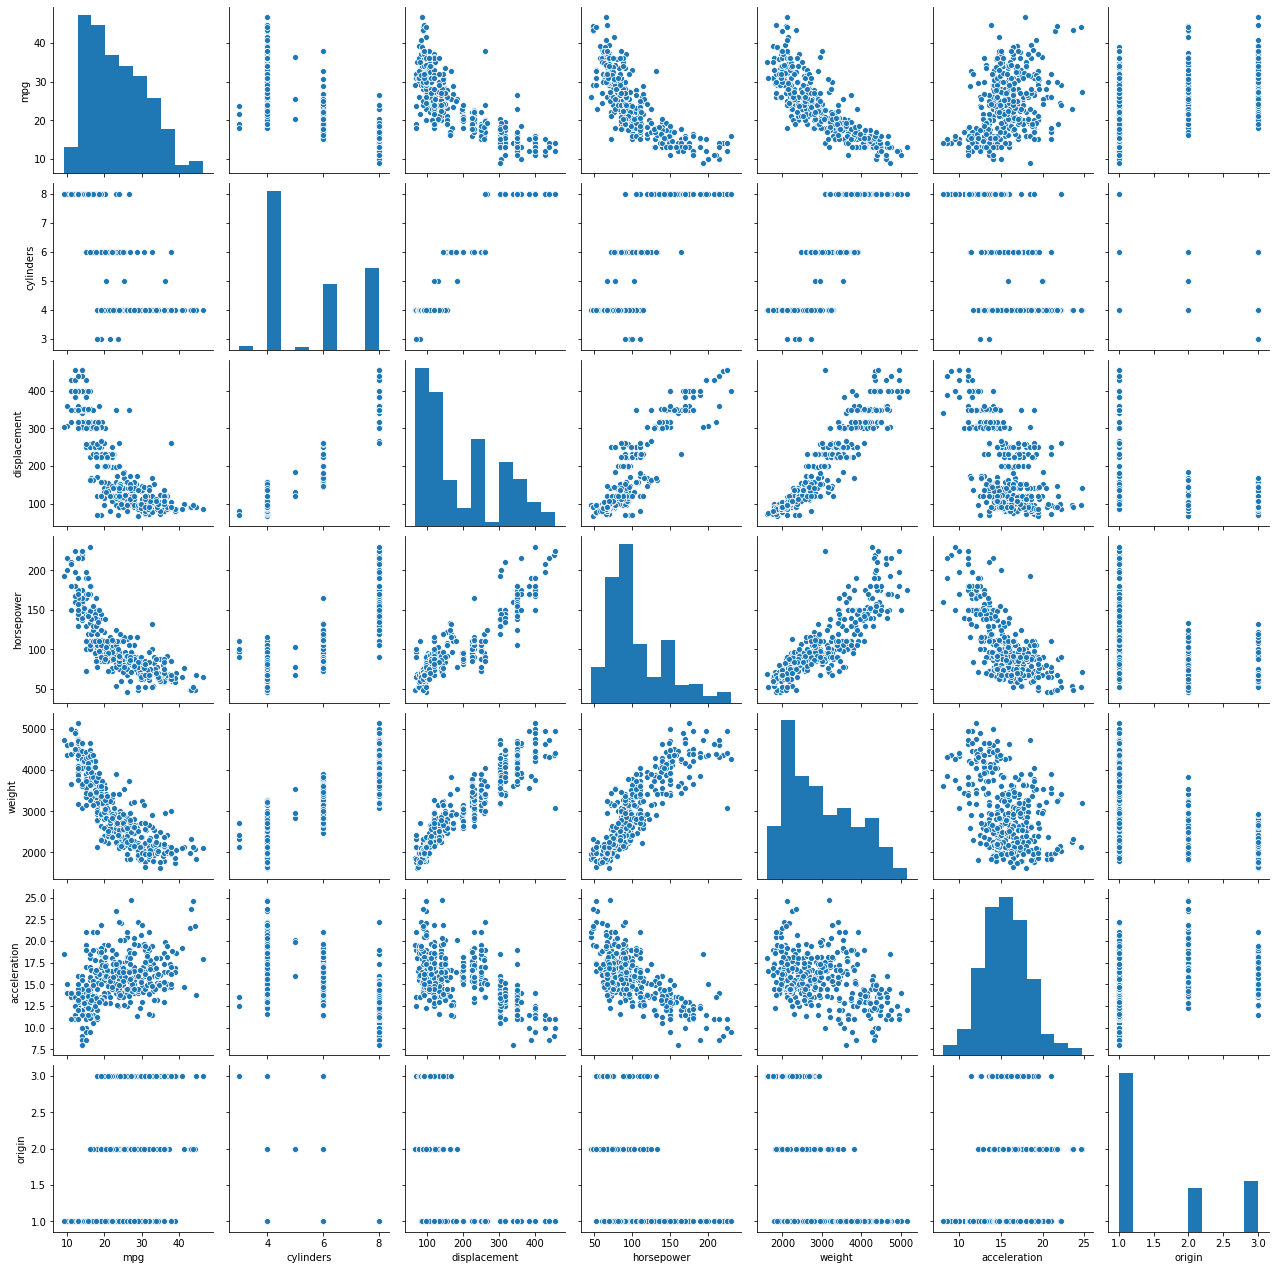

In [25]:
sns.pairplot(df)

### Question 5
Create a correlation heatmap as well, with seaborn plus the 'corr' function
Use .abs to grab the absolute value of the correlation

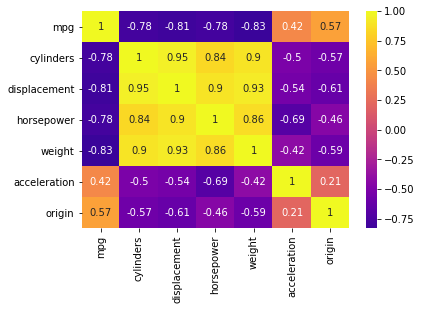

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin
mpg,1.000000,0.777618,0.805127,0.778427,0.832244,0.423329,0.565209
cylinders,0.777618,1.000000,0.950823,0.842983,0.897527,0.504683,0.568932
displacement,0.805127,0.950823,1.000000,0.897257,0.932994,0.543800,0.614535
horsepower,0.778427,0.842983,0.897257,1.000000,0.864538,0.689196,0.455171
weight,0.832244,0.897527,0.932994,0.864538,1.000000,0.416839,0.585005
acceleration,0.423329,0.504683,0.543800,0.689196,0.416839,1.000000,0.212746
origin,0.565209,0.568932,0.614535,0.455171,0.585005,0.212746,1.000000


In [30]:
u=sns.heatmap(df.corr(),cmap='plasma',center=0,annot=True)
bottom,top=u.get_ylim()
u.set_ylim(bottom+.5,top-.5) #At least for me there's a display error if I don't do this.  It's a version issue I believe. 
plt.show()


df.corr().mpg....

### Question 6
Now without the absolute value, to show direction of the correlation

### Question 7

Let's discuss these variables, looking both at the pairplot and the correlation heatmap - what are some trends you see? Any potential problems?

Here, we expect you to look at what kinds of data you have. You may also want to discuss how the data is distributed. Analyze both the relationships between independent variables and the relationships between independent variables and your target/dependent variable (miles per gallon).

### Question 8

Going a step further - what do you want to do to prepare this data for a regression model? List at least two things you'd want to do before running a regression model using any of this data.

### Question 9

Now it's time to run a simple linear regression model! Using statsmodels' OLS function, imported below, pick a single variable to run and evaluate the result.

In [39]:
# Importing statsmodels' OLS function
import statsmodels.api as sm
from statsmodels.formula.api import ols
model=ols(formula='mpg~weight',data=df).fit()

In [40]:
# Code here for single variable regression model plus a summary output
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Tue, 30 Jun 2020   Prob (F-statistic):          6.02e-102
Time:                        19:51:28   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.2165      0.799     57.867      0.000      44.646      47.787
weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Question 10

Interpret the r-squared value and the coefficient for your predictor variable

### Question 11

All together now... let's run a regression output for all of our independent variables!

In [50]:
# Code here for a multiple regression model with all of our independent vars
multi_model=ols(formula='mpg~'+"+".join(df.drop(columns='mpg').columns.to_list()),data=df).fit()
multi_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     165.5
Date:                Tue, 30 Jun 2020   Prob (F-statistic):          2.42e-103
Time:                        19:54:10   Log-Likelihood:                -1111.3
No. Observations:                 392   AIC:                             2237.
Df Residuals:                     385   BIC:                             2264.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       43.2893      2.706     15.995      0.000      37.968      48.611
cylinders       -0.5659      0.404     -1.401      0.162      -1.360       0.228
displacement     0.0125      0.009      1.335      0.183      -0.006       0.031
horsepower      -0.0621      0.017     -3.700      0.000      -0.095      -0.029
weight          -0.0049      0.001     -6.055      0.000      -0.006      -0.003
acceleration    -0.0335      0.123     -0.272      0.785      -0.276       0.209
origin           1.4668      0.347      4.221      0.000       0.784       2.150
==============================================================================
Omnibus:                       32.228   Durbin-Watson:                   0.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.172
Skew:                           0.619   Prob(JB):                     4.22e-10
Kurtosis:                       4.053   Cond. No.                     4.01e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Question 12

Interpret the r-squared value of this model and compare it to the simple model you created above. Which predictors are significant and which are not?

## Further Practice

Do the same as above, but using selections of independent variables.

In [ ]:
# Code here
